# Ch04-2. 확률적 경사 하강법

## 확률적 경사 하강법

**에포크(epoch)** : 훈련 세트를 한 번 모두 사용하는 과정

**미니배치 경사 하강법** : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식

**배치 경사 하강법** : 전체 샘플을 사용해 경사 하강법을 수행

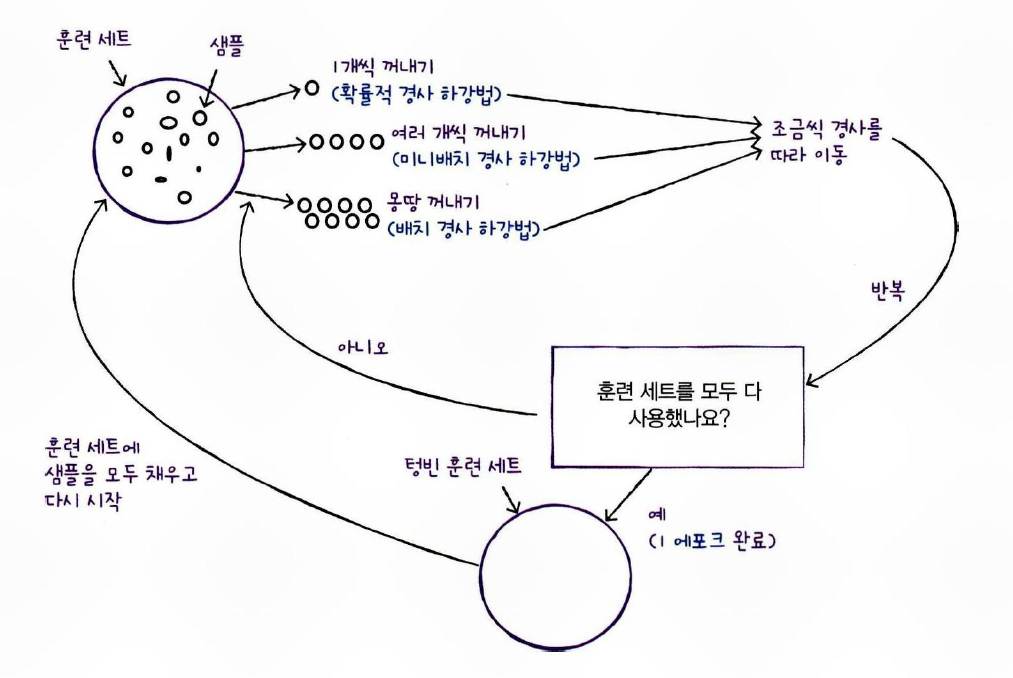

### SGDClassifier

In [24]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [25]:
# Species 열 → 타깃 데이터
# 나머지는 입력 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

In [26]:
# 훈련 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [27]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import SGDClassifier

# loss='log_loss' : 로지스틱 손실 함수
# max_iter=10 : 수행할 에포크 횟수 지정. 전체 훈련 세트를 10회 반복.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)   
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/heeseung2ya/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


확률적 경사 하강법은 점진적 학습이 가능함.

객체를 다시 만들지 않고, partial_fit() 메서드로 이어서 훈련 진행.

In [29]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


에포크를 한번 더 실행하니 정확도가 향상되었음.

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소함. → 과대적합 시작

**조기 종료(early stopping)** : 과대적합이 시작하기 전에 훈련을 멈추는 것.

In [30]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [31]:
# 300번의 에포크 동안 훈련 반복 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

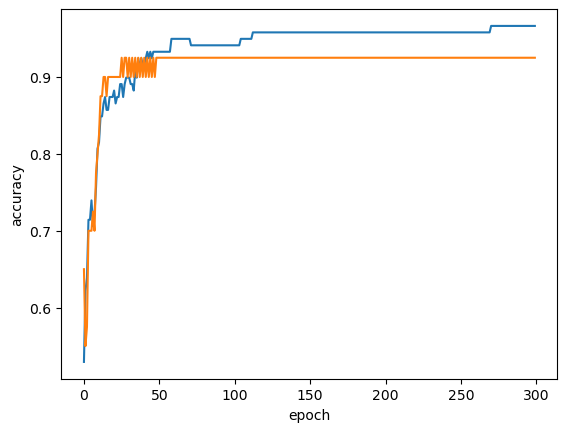

In [32]:
# 300번 에포크 동안 기록된 훈련 세트와 테스트 세트의 점수 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100번째 이후로는 훈련 세트 그래프와 테스트 세트 그래프의 간격이 벌어지고 있음.

In [37]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [38]:
# 힌지 손실을 사용한 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
